In [1]:
import pandas as pd
import numpy as np  
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
# For reproducibility of results
np.random.seed(0)

# Load the dataset if selected_features.csv does exist
if os.path.exists("selected_features.csv"):
    selected_features = pd.read_csv("selected_features.csv")
    print(selected_features.head())
else:
    print("The dataset is not present in the current directory.")

       2      7      8     11     14     15     17     18     21     22  ...  \
0 -0.684 -0.113  0.401 -0.251 -0.178  0.321  0.016 -0.003 -0.275 -0.162  ...   
1 -0.529 -0.066 -0.168 -0.205  0.020  0.031 -0.165 -0.026 -0.130  0.176  ...   
2 -0.240  0.031 -0.077 -0.036 -0.005  0.170  0.212  0.138 -0.300  0.689  ...   
3 -0.062 -0.143  0.068 -0.295 -0.188 -0.317 -0.113  0.018 -0.272 -0.531  ...   
4 -0.203 -0.168  0.008  0.166 -0.048 -0.291 -0.091  0.062  0.026 -0.036  ...   

      54     56     57     58     59     60     64     66     68  label  
0 -0.263 -0.075 -0.327 -0.198 -0.257 -0.205 -0.223 -0.136 -0.132      0  
1 -0.064  0.004 -0.305 -0.018 -0.230 -0.150 -0.151 -0.031 -0.097      0  
2 -0.149  0.102 -0.189 -0.112 -0.121  0.121 -0.172  0.033 -0.321      0  
3 -0.245 -0.153 -0.405 -0.102 -0.120 -0.141 -0.292 -0.078 -0.151      0  
4  0.043 -0.099 -0.188  0.042 -0.124 -0.097 -0.165 -0.112 -0.138      1  

[5 rows x 31 columns]


In [3]:
labels = selected_features.iloc[:, -1]
features = selected_features.iloc[:, :-1]

features, labels

(            2         7         8        11        14        15        17  \
 0   -0.684000 -0.113000  0.401000 -0.251000 -0.178000  0.321000  0.016000   
 1   -0.529000 -0.066000 -0.168000 -0.205000  0.020000  0.031000 -0.165000   
 2   -0.240000  0.031000 -0.077000 -0.036000 -0.005000  0.170000  0.212000   
 3   -0.062000 -0.143000  0.068000 -0.295000 -0.188000 -0.317000 -0.113000   
 4   -0.203000 -0.168000  0.008000  0.166000 -0.048000 -0.291000 -0.091000   
 ..        ...       ...       ...       ...       ...       ...       ...   
 391 -0.240811  0.160049 -0.172790  0.431347  0.430861 -0.305451 -0.119770   
 392 -0.179418 -0.000023 -0.260852  0.237564 -0.080075 -0.354038 -0.004051   
 393 -0.553610 -0.005744 -0.068708 -0.253044  0.017528 -0.070628 -0.172178   
 394  0.203276 -0.036268 -0.253699  0.382949  0.295444  0.049701 -0.245894   
 395 -0.221108  0.450663 -0.293762  0.042793  0.153844 -0.268618 -0.083691   
 
            18        21        22  ...        53        54   

## Min-Max

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_normalized = scaler.fit_transform(features)
dataset_normalized

array([[0.18304732, 0.49900892, 0.89076305, ..., 0.33932274, 0.34881517,
        0.52682455],
       [0.26365055, 0.52229931, 0.43373494, ..., 0.38908086, 0.44834123,
        0.54374094],
       [0.41393656, 0.5703667 , 0.50682731, ..., 0.37456807, 0.50900474,
        0.43547608],
       ...,
       [0.25085283, 0.55215857, 0.51348755, ..., 0.31353283, 0.41787867,
        0.28746834],
       [0.6444493 , 0.53703271, 0.3649004 , ..., 0.57430339, 0.55802938,
        0.67151474],
       [0.42376079, 0.77832656, 0.33272129, ..., 0.38708569, 0.42213365,
        0.63412131]])

# DecisionTreeClassifier

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, roc_auc_score, f1_score, matthews_corrcoef)

In [9]:
from math import log

# Define una función para calcular la entropía
def entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

# Define una función para calcular la ganancia de información
def information_gain(y, splits):
    parent_entropy = entropy(y)
    total_samples = len(y)
    child_entropy = sum((len(child) / total_samples) * entropy(child) for child in splits)
    return parent_entropy - child_entropy

In [39]:
# Initialize StratifiedKFold with 10 folds and a random seed for reproducibility
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# Define a set of reasonable default hyperparameters
default_max_depth = 11  # Starting with a small depth to prevent overfitting
default_min_samples_split = 6  # Minimum number of samples required to split a node
default_min_samples_leaf = 6   # Minimum number of samples required to be at a leaf node

# Initialize ID3 classifier with entropy criterion
id3 = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=default_max_depth, 
                             min_samples_split=default_min_samples_split, 
                             min_samples_leaf=default_min_samples_leaf)

# Initialize C4.5-like classifier with entropy criterion and auto max_features
c45 = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=default_max_depth, 
                             min_samples_split=default_min_samples_split, 
                             min_samples_leaf=default_min_samples_leaf,
                             max_features='sqrt')

# Initialize CART classifier with gini criterion and best splitter
cart = DecisionTreeClassifier(criterion='gini', 
                              max_depth=default_max_depth, 
                              min_samples_split=default_min_samples_split, 
                              min_samples_leaf=default_min_samples_leaf,
                              splitter='best')

# Store classifiers in a list for easy iteration
classifiers = [('ID3', id3), ('C4.5', c45), ('CART', cart)]

In [43]:
# Initialize lists to store metrics for each classifier
conf_matrices = []
acc_scores = []
pre_scores = []
rec_scores = []
auc_scores = []
f1_scores = []
mcc_scores = []
sensitivity_scores = [] 
specificity_scores = [] 

# Loop through each classifier
for name, clf in classifiers:
    # Initialize lists to store metrics for each fold
    conf_matrix_fold = []
    acc_scores_fold = []
    pre_scores_fold = []
    rec_scores_fold = []
    auc_scores_fold = []
    f1_scores_fold = []
    mcc_scores_fold = []
    sensitivity_scores_fold = [] 
    specificity_scores_fold = [] 
    
    # Loop through each fold
    for train_index, test_index in skf.split(dataset_normalized, labels):
        # Split the dataset into training and testing sets
        X_train, X_test = dataset_normalized[train_index], dataset_normalized[test_index]
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
        
        # Fit the classifier and make predictions
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        
        # Calculate metrics and append to lists
        conf_matrix_fold.append(confusion_matrix(y_test, y_pred))
        acc_scores_fold.append(accuracy_score(y_test, y_pred))
        pre_scores_fold.append(precision_score(y_test, y_pred))
        rec_scores_fold.append(recall_score(y_test, y_pred))
        auc_scores_fold.append(roc_auc_score(y_test, y_pred_proba))
        f1_scores_fold.append(f1_score(y_test, y_pred))
        mcc_scores_fold.append(matthews_corrcoef(y_test, y_pred))
           # Calculate sensitivity and specificity
        true_positives = conf_matrix_fold[-1][1, 1]
        true_negatives = conf_matrix_fold[-1][0, 0]
        false_positives = conf_matrix_fold[-1][0, 1]
        false_negatives = conf_matrix_fold[-1][1, 0]
        
        sensitivity = true_positives / (true_positives + false_negatives)
        specificity = true_negatives / (true_negatives + false_positives)
        
        sensitivity_scores_fold.append(sensitivity)
        specificity_scores_fold.append(specificity)
    
    # Append mean and standard deviation of metrics for each classifier
    conf_matrices.append(np.mean(conf_matrix_fold, axis=0))
    acc_scores.append((np.mean(acc_scores_fold), np.std(acc_scores_fold)))
    pre_scores.append((np.mean(pre_scores_fold), np.std(pre_scores_fold)))
    rec_scores.append((np.mean(rec_scores_fold), np.std(rec_scores_fold)))
    auc_scores.append((np.mean(auc_scores_fold), np.std(auc_scores_fold)))
    f1_scores.append((np.mean(f1_scores_fold), np.std(f1_scores_fold)))
    mcc_scores.append((np.mean(mcc_scores_fold), np.std(mcc_scores_fold)))
    sensitivity_scores.append((np.mean(sensitivity_scores_fold), np.std(sensitivity_scores_fold)))  
    specificity_scores.append((np.mean(specificity_scores_fold), np.std(specificity_scores_fold))) 

# Display metrics for each classifier
for i, (name, _) in enumerate(classifiers):
    print(f"Classifier: {name}")
    print(f"Confusion Matrix:\n{conf_matrices[i]}")
    print(f"Accuracy: Mean = {acc_scores[i][0]}, Std = {acc_scores[i][1]}")
    print(f"Precision: Mean = {pre_scores[i][0]}, Std = {pre_scores[i][1]}")
    print(f"Recall: Mean = {rec_scores[i][0]}, Std = {rec_scores[i][1]}")
    print(f"AUC: Mean = {auc_scores[i][0]}, Std = {auc_scores[i][1]}")
    print(f"F1 Score: Mean = {f1_scores[i][0]}, Std = {f1_scores[i][1]}")
    print(f"MCC: Mean = {mcc_scores[i][0]}, Std = {mcc_scores[i][1]}")
    print(f"Sensitivity: Mean = {sensitivity_scores[i][0]}, Std = {sensitivity_scores[i][1]}")  
    print(f"Specificity: Mean = {specificity_scores[i][0]}, Std = {specificity_scores[i][1]}")  
    print("\n")

Classifier: ID3
Confusion Matrix:
[[12.   7.4]
 [ 6.3 13.9]]
Accuracy: Mean = 0.6541666666666667, Std = 0.07212279164240129
Precision: Mean = 0.6572831116252168, Std = 0.07938475150941493
Recall: Mean = 0.6873809523809523, Std = 0.11032342681135932
AUC: Mean = 0.6818709273182957, Std = 0.07121292008651814
F1 Score: Mean = 0.6677096436495495, Std = 0.07663514606565541
MCC: Mean = 0.31132827730840906, Std = 0.14511133584843125
Sensitivity: Mean = 0.6873809523809523, Std = 0.11032342681135932
Specificity: Mean = 0.6173684210526316, Std = 0.127359721320983


Classifier: C4.5
Confusion Matrix:
[[13.9  5.5]
 [ 8.  12.2]]
Accuracy: Mean = 0.6589743589743591, Std = 0.07611055922478518
Precision: Mean = 0.6932222052113693, Std = 0.08605142377449625
Recall: Mean = 0.6045238095238095, Std = 0.1100579624654246
AUC: Mean = 0.7055253759398497, Std = 0.0916609167014291
F1 Score: Mean = 0.6411587976505292, Std = 0.08862397741785598
MCC: Mean = 0.32457703014924266, Std = 0.15198108972875984
Sensitivity

In [38]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters for tuning the CART classifier
param_grid = {
    'max_depth': range(1, 20),  # Test depths from 1 to 20
    'min_samples_split': range(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': range(1, 10)  # Minimum number of samples required at a leaf node
}

# Initialize the CART classifier
cart = DecisionTreeClassifier(criterion='gini',splitter='best')

# Initialize GridSearchCV with 10-fold stratified cross-validation
grid_search = GridSearchCV(cart, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Perform grid search on the normalized dataset
grid_search.fit(dataset_normalized, labels)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 5},
 0.6768589743589744)

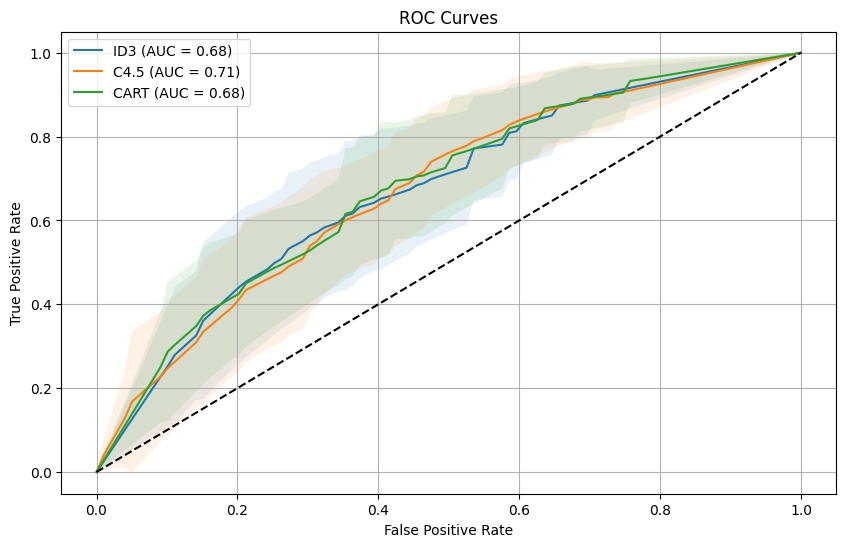

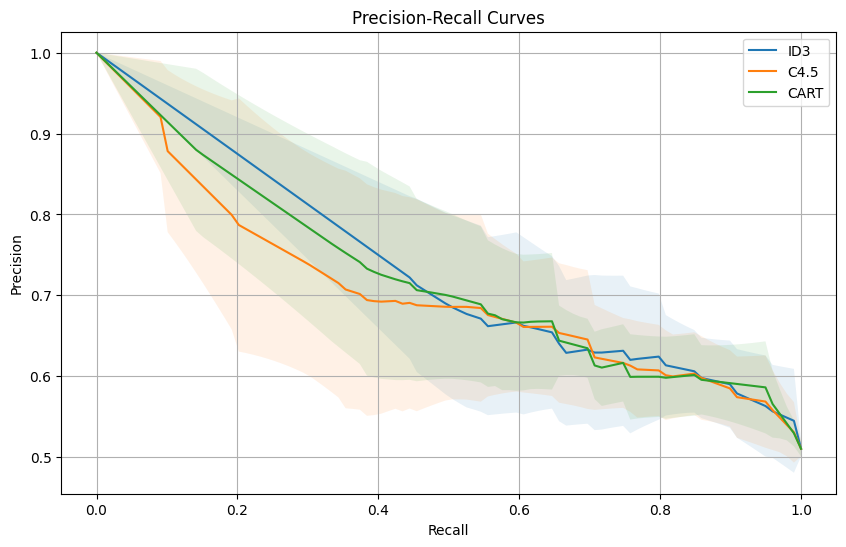

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# Assuming auc_scores and the other metrics have been computed correctly as in the provided code

# Define common thresholds for interpolation
common_thresholds = np.linspace(0, 1, 100)

# Initialize lists to store interpolated metrics for plotting
interp_tpr_list = []
interp_fpr_list = []
interp_precision_list = []
interp_recall_list = []

# Loop through each classifier
for name, clf in classifiers:
    # Initialize lists to store metrics for each fold
    tpr_fold = []
    fpr_fold = []
    precision_fold = []
    recall_fold = []
    
    # Loop through each fold
    for train_index, test_index in skf.split(dataset_normalized, labels):
        # Split the dataset into training and testing sets
        X_train, X_test = dataset_normalized[train_index], dataset_normalized[test_index]
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
        
        # Fit the classifier and make predictions
        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

        # Interpolate the TPR and FPR at the common thresholds
        interp_tpr = np.interp(common_thresholds, fpr, tpr)
        interp_tpr[0] = 0.0  # Ensuring that the curve starts at (0, 0)
        tpr_fold.append(interp_tpr)
        
        interp_fpr = common_thresholds  # FPR is the same as the common thresholds for ROC
        
        # Interpolate the precision and recall
        # For precision-recall curve, we flip the recall and precision arrays, and then interp
        interp_precision = np.interp(common_thresholds, recall[::-1], precision[::-1])
        interp_recall = common_thresholds  # Recall is the same as the common thresholds for Precision-Recall
        
        # Store the interpolated metrics
        fpr_fold.append(interp_fpr)
        tpr_fold.append(interp_tpr)
        precision_fold.append(interp_precision)
        recall_fold.append(interp_recall)
    
    # Calculate mean and standard deviation of metrics for plotting
    tpr_mean = np.mean(tpr_fold, axis=0)
    tpr_std = np.std(tpr_fold, axis=0)
    fpr_mean = np.mean(fpr_fold, axis=0)
    
    precision_mean = np.mean(precision_fold, axis=0)
    precision_std = np.std(precision_fold, axis=0)
    recall_mean = np.mean(recall_fold, axis=0)
    
    # Append metrics for each classifier
    interp_tpr_list.append((tpr_mean, tpr_std))
    interp_fpr_list.append(fpr_mean)
    interp_precision_list.append((precision_mean, precision_std))
    interp_recall_list.append(recall_mean)

# Plot ROC Curve for each classifier
plt.figure(figsize=(10, 6))
for i, (name, _) in enumerate(classifiers):
    mean_tpr, std_tpr = interp_tpr_list[i]
    mean_fpr = interp_fpr_list[i]
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {auc_scores[i][0]:.2f})')
    plt.fill_between(mean_fpr, mean_tpr-std_tpr, mean_tpr+std_tpr, alpha=0.1)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall Curve for each classifier
plt.figure(figsize=(10, 6))
for i, (name, _) in enumerate(classifiers):
    mean_precision, std_precision = interp_precision_list[i]
    mean_recall = interp_recall_list[i]
    plt.plot(mean_recall, mean_precision, label=f'{name}')
    plt.fill_between(mean_recall, mean_precision-std_precision, mean_precision+std_precision, alpha=0.1)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()

### ROC Curve Analysis

- Shape and Position: If the ROC curve is close to the top left corner, this indicates a good performance. A curve that approaches the 45-degree diagonal line reflects a less effective classifier, with a curve close to the line representing a random guess.
- AUC: The area under the ROC curve can give us an aggregate measure of performance across all possible classification thresholds. The closer this area is to 1, the better the model is at predicting 0s as 0s and 1s as 1s.


### Precision-Recall Curve Analysis 

- Shape and Position: In the Precision-Recall curve, the closer the curve follows the left-hand border and then the top border of the PR space, the more precise the classifier is.
- Balance between Precision and Recall: Depending on the business problem, you may want to have a balance between precision and recall. For example, in spam detection (where it might be okay to let some spam through but not okay to classify non-spam as spam), you would prefer high precision over recall.

Consider the following:

- ROC vs PR: If the positive class is rare or if you care more about the false positives than the false negatives, you should focus more on the Precision-Recall curve.
- Thresholds: Both curves can help in choosing a threshold that balances sensitivity and specificity (for ROC) or precision and recall (for PR) according to what is more important for your specific problem.
- Class Imbalance: In case of a class imbalance problem, the ROC curve might be overly optimistic and you should rely more on the Precision-Recall curve.

### ROC

Ideal Curve: The top-left corner of the plot represents the ideal point where we have a TPR of 1 (perfect recall) and an FPR of 0 (no false positives).
AUC (Area Under the Curve): This is a single scalar value summarizing the overall performance of the classifier. An AUC of 1.0 is perfect, and an AUC of 0.5 represents a performance no better than random guessing.
Analysis: When analyzing the ROC curve, a model that lies above the line of no-discrimination (the diagonal line) is considered to have some ability to distinguish between the positive and negative classes. The further the curve is from the diagonal, the better the model's predictive ability.

### Precision-Recall

Ideal Curve: The top-right corner of the plot represents an ideal point with perfect precision and recall.
AP (Average Precision): This summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.
Analysis: PR curves are more informative when the classes are very imbalanced because they focus on the performance of the classifier on the positive (minority) class.

